In [1]:
# effects of weighing and trimming

In [2]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [3]:
# statistics functions

import scikit_posthocs as scp

In [4]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import indoor data into df2
df2 = x2.parse('Indoor')

# Import offshore data ito df2
df3 = x2.parse('Offshore')

# Import outdoor data ito df4
df4 = x2.parse('Outdoor')

In [5]:
df2.head()

,Sample,Exp,Sleeve,Week,Stage,Timei,Timeh,Time,DW,mmi,...,Frequency,Amplitude,Duration,Flux,Sporulated,Comment,Day,Comment2,Unnamed: 38,N_Saturation
0,0.0,1,0,0.0,i,"2019,3,12,13,0","2019,3,12,13,0","2019,3,12,13,0",0.750,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
1,0.7,1,0,0.0,f,"2019,3,12,13,0","2019,3,12,13,0","2019,3,19,13,0",0.753,50.0,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
2,1.0,1,1,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.144,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
3,2.0,1,2,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.153,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
4,3.0,1,3,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.159,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes


In [6]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)]
rp.summary_cont(dW['DGR'].groupby(dW['Weighing']))

C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


,N,Mean,SD,SE,95% Conf.,Interval
Weighing,,,,,,
0.0,9,0.2191,0.0850,0.0283,0.1538,0.2844
1.0,3,0.1968,0.0478,0.0276,0.0780,0.3156
2.0,4,0.0955,0.0959,0.0479,-0.0571,0.2480
4.0,1,0.2274,NaN,NaN,NaN,NaN


In [7]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 2)]
rp.summary_cont(dW['DGR'].groupby(dW['Weighing']))

,N,Mean,SD,SE,95% Conf.,Interval
Weighing,,,,,,
0.0,5,0.1508,0.1129,0.0505,0.0106,0.2909
1.0,3,0.2150,0.0491,0.0283,0.0931,0.3370
2.0,4,0.2007,0.0145,0.0072,0.1777,0.2237
4.0,2,0.1835,0.0292,0.0206,-0.0784,0.4454


In [8]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 3)]
rp.summary_cont(dW['DGR'].groupby(dW['Weighing']))

C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


,N,Mean,SD,SE,95% Conf.,Interval
Weighing,,,,,,
0.0,6,0.1719,0.0600,0.0245,0.1090,0.2348
1.0,3,0.1454,0.0209,0.0121,0.0934,0.1974
2.0,4,0.2107,0.0955,0.0477,0.0588,0.3627
4.0,1,0.2257,NaN,NaN,NaN,NaN


In [9]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)]
rp.summary_cont(dW['DGR'].groupby(dW['Trimming']))

C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
Trimming,,,,,,
0.0,11,0.1976,0.0938,0.0283,0.1346,0.2606
1.0,4,0.2236,0.0329,0.0165,0.1712,0.2760
2.0,2,0.0514,0.0000,0.0000,NaN,NaN


In [10]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 2)]
rp.summary_cont(dW['DGR'].groupby(dW['Trimming']))

,N,Mean,SD,SE,95% Conf.,Interval
Trimming,,,,,,
0.0,8,0.1760,0.0955,0.0338,0.0962,0.2559
1.0,4,0.1844,0.0170,0.0085,0.1574,0.2114
2.0,2,0.2114,0.0081,0.0057,0.1388,0.2840


In [11]:
# data summary of treatment 500/2/168 DGR, by number of weighings, all weeks
dW = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 3)]
rp.summary_cont(dW['DGR'].groupby(dW['Trimming']))

,N,Mean,SD,SE,95% Conf.,Interval
Trimming,,,,,,
0.0,9,0.1735,0.0599,0.0200,0.1275,0.2195
1.0,3,0.1544,0.0778,0.0449,-0.0388,0.3477
2.0,2,0.2557,0.0384,0.0271,-0.0892,0.6006


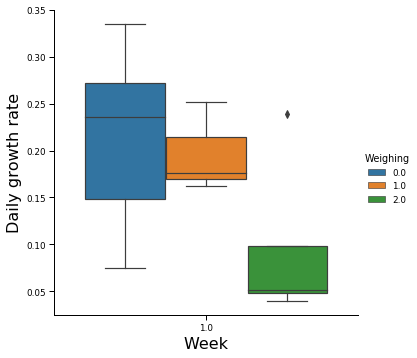

In [12]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)&(df2.Weighing != 4)],kind='box',hue='Weighing').set(ylabel='Daily growth rate')

#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue = 'Weighing').set(xlabel='\n Week #', ylabel='Daily growth rate')


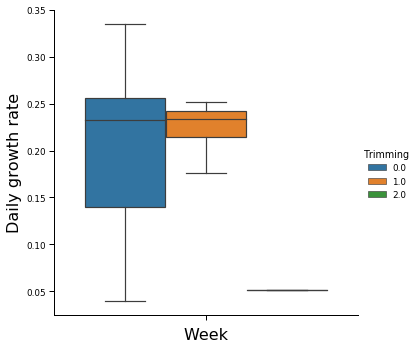

In [13]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == 1)],kind='box',hue='Trimming').set(ylabel='Daily growth rate')
SA1_TRM.set_xticklabels([''])
#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


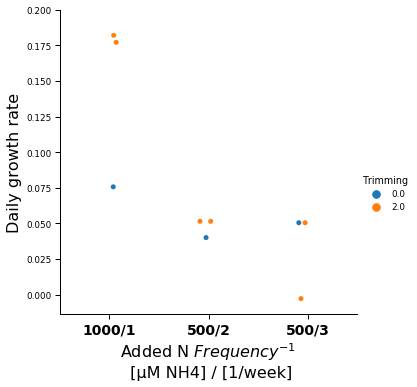

In [14]:
# S.A #1 - growth rates in different amplitudes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_TRM = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment != 'Acclimation')&(df2.Week == 1)&(df2.Exp == 4)],hue='Trimming').set(xlabel='Added N $Frequency^{-1}$ \n [µM NH4] / [1/week]', ylabel='Daily growth rate')
SA1_TRM.set_xticklabels(['1000/1', '500/2','500/3'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#SA1_TRM.set_xticklabels([''])
#SA1_TRM.set_xticklabels(['1000/1', '500/2','200/5'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_TRM = sns.stripplot(x = 'Week', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')&(df2.Duration == 168)&(df2.Flux == 1000)&(df2.Treatment == '500/2/168')],hue = 'Trimming').set(xlabel='\n Week #', ylabel='Daily growth rate')


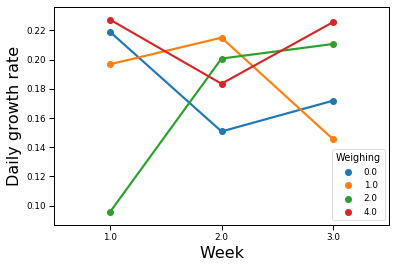

In [15]:
# weighing effect
palette = sns.color_palette("tab10",4)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
ax = sns.pointplot(data=d,palette=palette, x="Week", y="DGR", hue="Weighing",err_kws=None,ci=None).set(xlabel='Week', ylabel='Daily growth rate')
#ax.setp(ax.get_xticklabels([1,2,3]), rotation=45)

#ax.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})


In [16]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['DGR'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Weighing']))

,N,Mean,SD,SE,95% Conf.,Interval
Weighing,,,,,,
0.0,20,0.1878,0.0870,0.0195,0.1471,0.2285
1.0,9,0.1857,0.0476,0.0159,0.1492,0.2223
2.0,12,0.1690,0.0895,0.0258,0.1121,0.2259
4.0,4,0.2050,0.0300,0.0150,0.1572,0.2528


In [17]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['DGR'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Trimming']))

,N,Mean,SD,SE,95% Conf.,Interval
Trimming,,,,,,
0.0,28,0.1837,0.0826,0.0156,0.1517,0.2157
1.0,11,0.1905,0.0497,0.0150,0.1571,0.2238
2.0,6,0.1729,0.0977,0.0399,0.0703,0.2754


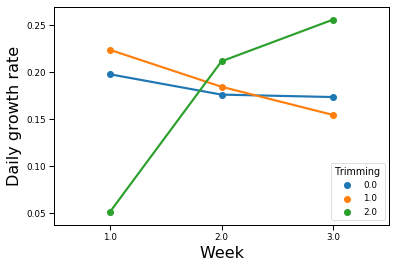

In [18]:
# weighing effect
palette = sns.color_palette("tab10",4)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
ax = sns.pointplot(data=d,palette=palette, x="Week", y="DGR", hue="Trimming",err_kws=None,ci=None).set(xlabel='Week', ylabel='Daily growth rate')
#ax.setp(ax.get_xticklabels([1,2,3]), rotation=45)

#ax.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})


In [19]:
# trimming effect
palette = sns.color_palette("tab10",3)

d = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]#&(np.isnan(df2.Weighing)!= True)]
sns.pointplot('Week','DGR', data=d,palette=palette,hue="Trimming",err_kws=None,ci=None,ax=ax).set(xlabel='Week', ylabel='Daily growth rate')
#,err_style="band", ci="sd")
#ax.set_xticklabels(['1','2','3'])


C:\Users\meiro\Anaconda3new\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'list' object has no attribute 'plot'